# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT5qaBV39KxL2ViGJdv1_8J6zOj-U59NGL6BbfxRW_0Mf5mGAWkat7o25CNGKaLJGyry9BAOOaXgiD7/pub?gid=352973935&single=true&output=csv')

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Distribution**

### **Air Temperature**

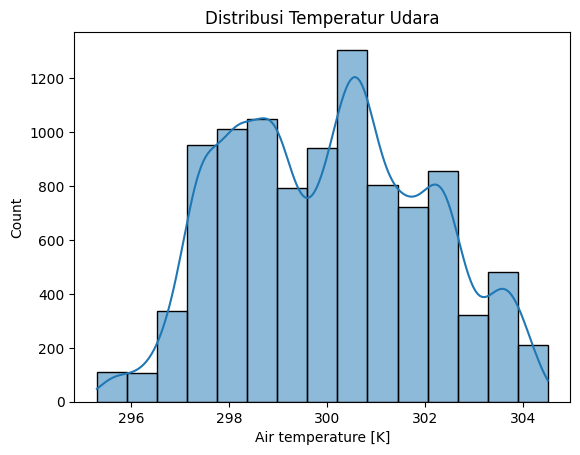

In [3]:
sns.histplot(df['Air temperature [K]'], kde=True, bins=15)
plt.title('Distribusi Temperatur Udara')
plt.show()

### **Process Temperature**

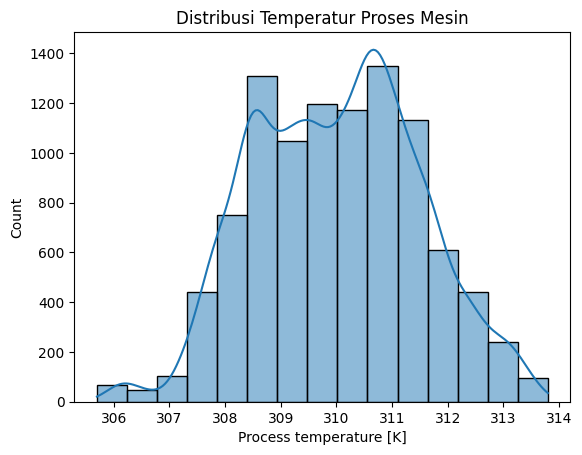

In [4]:
sns.histplot(df['Process temperature [K]'], kde=True, bins=15)
plt.title('Distribusi Temperatur Proses Mesin')
plt.show()

### **Torque**

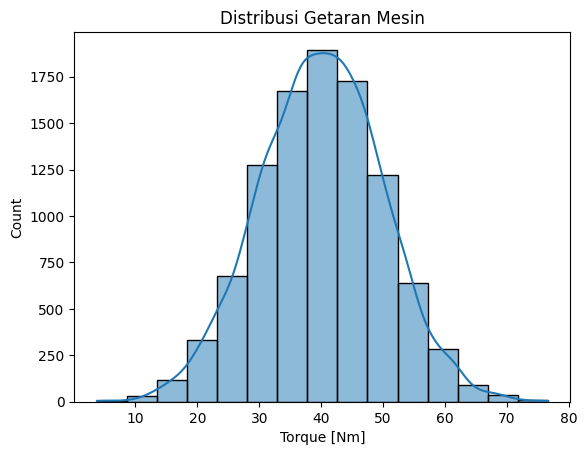

In [5]:
sns.histplot(df['Torque [Nm]'], kde=True, bins=15)
plt.title('Distribusi Getaran Mesin')
plt.show()

### **Tool Wear**

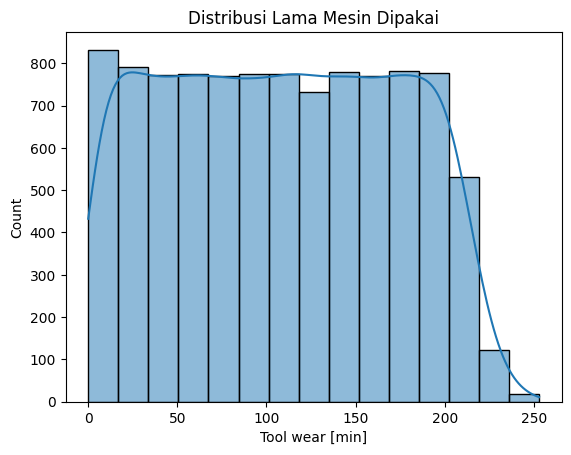

In [6]:
sns.histplot(df['Tool wear [min]'], kde=True, bins=15)
plt.title('Distribusi Lama Mesin Dipakai')
plt.show()

## **Relationship**

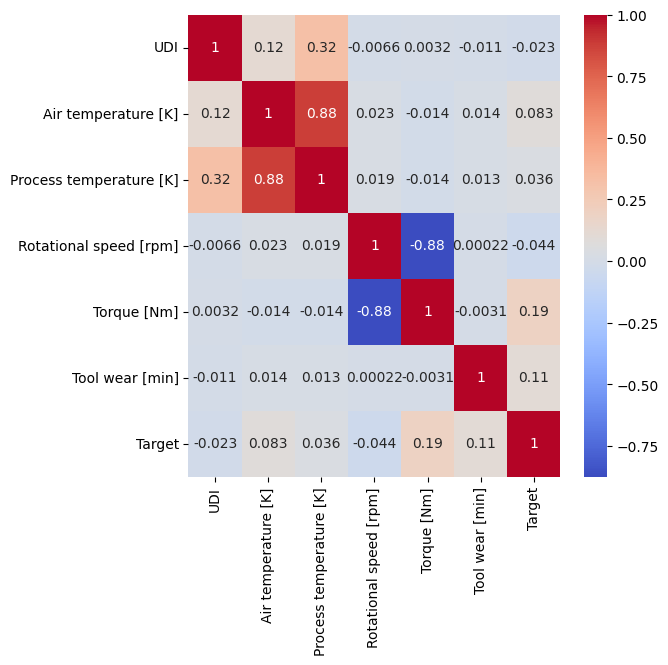

In [7]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Kolom "Process temperature [K]" memiliki korelasi positif yang kuat dengan "Air temperature [K]".

Kolom "Rotational speed [rpm]" memiliki korelasi negatif yang kuat dengan "Torque [Nm]".

## **Comparison**

### **Machine Type**

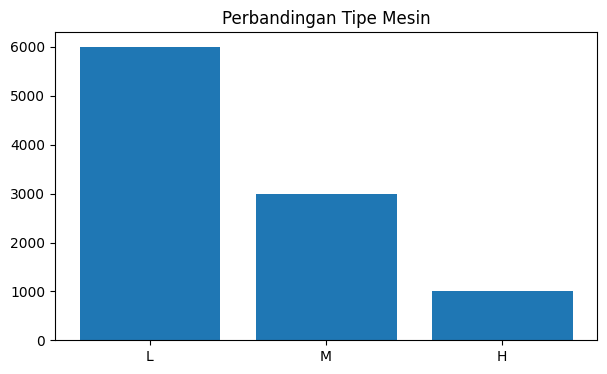

In [8]:
plt.figure(figsize=(7, 4))
plt.bar(df['Type'].value_counts().index, df['Type'].value_counts())
plt.title('Perbandingan Tipe Mesin')
plt.show()

Komposisi tipe mesin didominasi oleh tipe L sebanyak 60%. Sedangkan untuk tipe mesin M sebanyak 30% dan tipe mesin H sebanyak 10%.

### **Target**

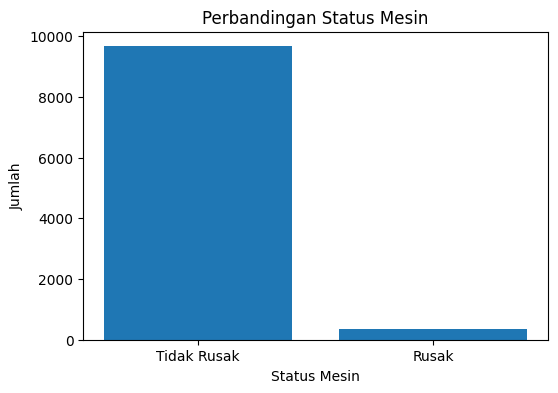

In [9]:
counts = df['Target'].value_counts()
labels = ['Tidak Rusak' if x == 0 else 'Rusak' for x in counts.index]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts.values)
plt.title('Perbandingan Status Mesin')
plt.xlabel('Status Mesin')
plt.ylabel('Jumlah')
plt.show()

Mayoritas data pada dataset ini adalah data mesin yang tidak rusak.

## **Composition**

### **Machine Type**

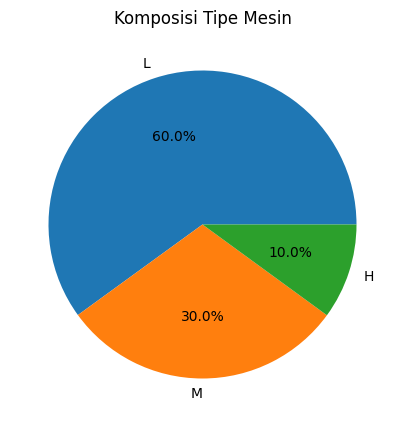

In [10]:
plt.figure(figsize=(5, 5))
plt.pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%')
plt.title('Komposisi Tipe Mesin')
plt.show()

Komposisi tipe mesin didominasi oleh tipe L sebanyak 60%. Sedangkan untuk tipe mesin M sebanyak 30% dan tipe mesin H sebanyak 10%.

### **Target**

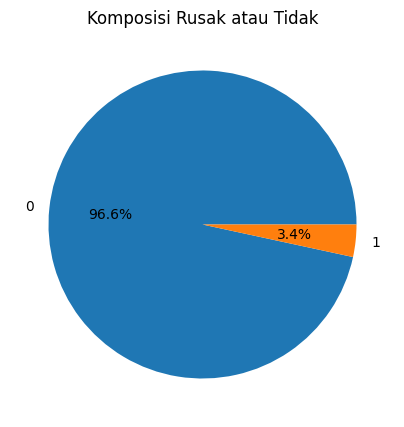

In [11]:
plt.figure(figsize=(5, 5))
plt.pie(df['Target'].value_counts(), labels=df['Target'].value_counts().index, autopct='%1.1f%%')
plt.title('Komposisi Rusak atau Tidak')
plt.show()

Mayoritas data pada dataset ini adalah data mesin yang tidak rusak.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Missing Values**

In [12]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Karena tidak ada missing values, tahap ini dilewati.

## **Outlier Values**

In [13]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results = pd.DataFrame(results)
results.set_index('Kolom', inplace=True)
results = results.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results)

Kolom,Persentase Outliers
UDI,0.00
Air temperature [K],0.00
Process temperature [K],0.00
Rotational speed [rpm],4.18
Torque [Nm],0.69
Tool wear [min],0.00
Target,3.39


Terdapat outlier pada kolom “Rotational speed [rpm]” sebesar 4,18%, kolom “Torque [Nm]” sebesar 0,69%, dan kolom “Target” sebesar 3,39%. Outlier pada kolom “Rotational speed [rpm]” dan “Torque [Nm]” akan ditangani, sedangkan outlier pada kolom “Target” tidak akan ditangani karena kolom tersebut hanya berisi dua nilai kategorik, yaitu 0 dan 1.

In [14]:
columns_to_fix = [
    'Rotational speed [rpm]', 'Torque [Nm]'
]

for col in columns_to_fix:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

Menangani outlier dengan metode capping.

In [15]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results = pd.DataFrame(results)
results.set_index('Kolom', inplace=True)
results = results.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results)

Kolom,Persentase Outliers
UDI,0.00
Air temperature [K],0.00
Process temperature [K],0.00
Rotational speed [rpm],0.00
Torque [Nm],0.00
Tool wear [min],0.00
Target,3.39


Outlier pada kolom "Rotational speed [rpm]" dan "Torque [Nm]" berhasil ditangani.

## **Duplicated Values**

In [16]:
print(f"Jumlah nilai duplikat: {df.duplicated().sum()}")

Jumlah nilai duplikat: 0


Tidak ada data yang duplikat, tahap ini dilewati.

## **Inconsistent Values**

In [17]:
df[(df['Target'] == 0) & (df['Failure Type'] != 'No Failure')]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399.0,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505.0,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626.0,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570.0,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447.0,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687.0,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602.0,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346.0,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499.0,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357.0,55.0,12,0,Random Failures


Terdapat kolom tidak rusak tetapi memiliki tipe kerusakan Random Failures.

In [18]:
df[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439.0,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685.0,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419.0,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421.0,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363.0,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438.0,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663.0,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710.0,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431.0,49.7,210,1,No Failure


Terdapat kolom rusak tetapi memiliki tipe No Failure.

In [19]:
df = df[~((df['Target'] == 0) & (df['Failure Type'] != 'No Failure'))]
df = df[~((df['Target'] == 1) & (df['Failure Type'] == 'No Failure'))]

Kode ini menghapus kolom yang dirasa anomaly.

In [20]:
kondisi1 = df[(df['Target'] == 0) & (df['Failure Type'] != 'No Failure')]
kondisi2 = df[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')]
if (not kondisi1.empty) or (not kondisi2.empty):
    print('Masih ada inconsistent values')
else:
    print('Sudah aman, tidak ada inconsistent values')

Sudah aman, tidak ada inconsistent values


## **Data Reduction**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9973 non-null   int64  
 1   Product ID               9973 non-null   object 
 2   Type                     9973 non-null   object 
 3   Air temperature [K]      9973 non-null   float64
 4   Process temperature [K]  9973 non-null   float64
 5   Rotational speed [rpm]   9973 non-null   float64
 6   Torque [Nm]              9973 non-null   float64
 7   Tool wear [min]          9973 non-null   int64  
 8   Target                   9973 non-null   int64  
 9   Failure Type             9973 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 857.1+ KB


Terdapat kolom dengan nilai unik pada dataset yaitu UDI dan Product ID. Dikarenakan nilai unik tidak digunakana untuk proses permodelan, maka akan dihapus.

In [22]:
df = df.drop(['UDI', 'Product ID'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   object 
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   float64
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 701.2+ KB


Kolom UDI dan Product ID berhasil dihapus.

## **Data Transformation**

In [24]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9,0,No Failure


Terdapat kolom Type yang memiliki nilai L, M, dan H. Nilai pada kolom ini akan di encoding untuk membantu proses pemodelan nantinya.

In [25]:
typeMapping = {
    'L': 1,
    'M': 2,
    'H': 3
}

df['Type'] = df['Type'].map(typeMapping)

In [26]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551.0,42.8,0,0,No Failure
1,1,298.2,308.7,1408.0,46.3,3,0,No Failure
2,1,298.1,308.5,1498.0,49.4,5,0,No Failure
3,1,298.2,308.6,1433.0,39.5,7,0,No Failure
4,1,298.2,308.7,1408.0,40.0,9,0,No Failure


In [27]:
df.to_csv('dataset_mesin_membangun_sistem_machine_learning_preprocessing.csv')